# Null hypothesis significant testing

In the previous sections, we have measures properties of networks. We may now want to ask whether the values we observed are different from what we would expect at random. The process to reach this conclusion is as follows:

- pick a network we want to test
- estimate the probability of every interaction using a *null model*
- generate a large number of random networks from this matrix of probabilities
- measure the value of interest on every random network
- test the probability that the value on the empirical network belongs to the distribution derived from the random samples

In this example, we will test whether a host-parasite networks is *more* nested than expected given its degree distribution.

## Loading the required packages

In [2]:
import Pkg; Pkg.activate(".")

Activating environment at `~/EcoNetworksLabs/Project.toml`


We willrequire a few packages for this example:

In [17]:
using EcologicalNetworks
using Plots
using StatsBase
using Random

## Loading a network

To illustrate NHST, we will take one host-parasite network, remove the quantitative information, and then assign it to a variable named `N`.

In [5]:
N = convert(BipartiteNetwork, web_of_life("A_HP_001"))

18×10 bipartite  ecological network (Bool, String) (L: 61)

The first step is to get the *observed* value of the quantity of interest, for example NODF:

In [6]:
obs = nodf(N)

0.639664124909223

As a second step, we need to transform this network into a probabilistic network, using one of the standard null models. In this example, we will use the type II null model, which accounts for the degree distribution of both sides of the network:

In [7]:
template = null2(N)

18×10 bipartite probabilistic ecological network (Float64, String) (L: 60.99999999999999)

Note that the value of $L$ might be slightly different from what it said in the deterministic network. This is because numbers are difficult to represent for computers, and this will not have too much adverse effects.

From this template, we want to generate *a lot* of random networks. `EcologicalNetworks` extends the usual *Julia* functions, so we can call `rand`:

In [8]:
draws = rand(template, 10_000)

10000-element Array{BipartiteNetwork{Bool,String},1}:
 18×10 bipartite  ecological network (Bool, String) (L: 57)
 18×10 bipartite  ecological network (Bool, String) (L: 56)
 18×10 bipartite  ecological network (Bool, String) (L: 71)
 18×10 bipartite  ecological network (Bool, String) (L: 74)
 18×10 bipartite  ecological network (Bool, String) (L: 60)
 18×10 bipartite  ecological network (Bool, String) (L: 59)
 18×10 bipartite  ecological network (Bool, String) (L: 65)
 18×10 bipartite  ecological network (Bool, String) (L: 47)
 18×10 bipartite  ecological network (Bool, String) (L: 69)
 18×10 bipartite  ecological network (Bool, String) (L: 57)
 18×10 bipartite  ecological network (Bool, String) (L: 74)
 18×10 bipartite  ecological network (Bool, String) (L: 63)
 18×10 bipartite  ecological network (Bool, String) (L: 55)
 ⋮                                                         
 18×10 bipartite  ecological network (Bool, String) (L: 59)
 18×10 bipartite  ecological network (Bool, St

This will have generated $10^4$ networks. Each of these networks is generated in the following way: every interactions is considered to be a probability $p$, and the network is filled with the output of a Bernoulli trial with probability of success $p$. For example, if the null model says that an interaction has a probability of $0.5$, we expect that about half of the random draws will have this interaction.

We can now have a look at the values of NODF in this random sample. The `f.(x)` notation means "apply `f` to every element of `x`".

In [9]:
r = nodf.(draws)

10000-element Array{Float64,1}:
 NaN                  
 NaN                  
   0.5264651416122004 
   0.519256924992219  
 NaN                  
   0.4522118477020438 
   0.3216552546944703 
   0.4053906006847183 
   0.44660675381263626
 NaN                  
   0.48483115468409593
 NaN                  
 NaN                  
   ⋮                  
   0.3964674758792406 
   0.5106644880174293 
 NaN                  
   0.37533224400871457
   0.4710403050108931 
 NaN                  
   0.4198879551820729 
   0.4872642390289449 
   0.4517403257599336 
   0.43171802054154995
   0.4266448801742919 
   0.40215997510115153

Weird, some of these networks have a value of `NaN`. This is because some of the random networks are *degenerate*, *i.e.* they have species with no interactions left. Let's remove them.

The `filter(condition, collection)` function will select only the elements of `collection` which satisfy `condition` (which is a function). In this case, we use `!isdegenerate`, *i.e.* the opposite of "is the network degenerate", to return only networks with connected species. Remember to use `?` to learm more about a function -- in this case, `?filter` will give you a lot of information!

Note that we use the `filter!` function - it *modifies* the collection on which it is called. By convention, *Julia* function ending with `!` will change their arguments.

In [13]:
filter!(!isdegenerate, draws)

5532-element Array{BipartiteNetwork{Bool,String},1}:
 18×10 bipartite  ecological network (Bool, String) (L: 71)
 18×10 bipartite  ecological network (Bool, String) (L: 74)
 18×10 bipartite  ecological network (Bool, String) (L: 59)
 18×10 bipartite  ecological network (Bool, String) (L: 65)
 18×10 bipartite  ecological network (Bool, String) (L: 47)
 18×10 bipartite  ecological network (Bool, String) (L: 69)
 18×10 bipartite  ecological network (Bool, String) (L: 74)
 18×10 bipartite  ecological network (Bool, String) (L: 59)
 18×10 bipartite  ecological network (Bool, String) (L: 67)
 18×10 bipartite  ecological network (Bool, String) (L: 65)
 18×10 bipartite  ecological network (Bool, String) (L: 65)
 18×10 bipartite  ecological network (Bool, String) (L: 65)
 18×10 bipartite  ecological network (Bool, String) (L: 63)
 ⋮                                                         
 18×10 bipartite  ecological network (Bool, String) (L: 64)
 18×10 bipartite  ecological network (Bool, Str

After removing the networks with degenerate matrices, we can apply NODF to all of them. We will use the `.` syntax, where `f.(x)` means *apply f to every element of x*. In our example, we want to apply `nodf` to every element of `draws`.

In [15]:
nodf_random = nodf.(draws)

5532-element Array{Float64,1}:
 0.5264651416122004 
 0.519256924992219  
 0.4522118477020438 
 0.3216552546944703 
 0.4053906006847183 
 0.44660675381263626
 0.48483115468409593
 0.45798085901027075
 0.45316187080892967
 0.4979411764705882 
 0.45212937026662514
 0.43273420479302827
 0.44676314970432607
 ⋮                  
 0.4179084967320262 
 0.3962254901960785 
 0.3964674758792406 
 0.5106644880174293 
 0.37533224400871457
 0.4710403050108931 
 0.4198879551820729 
 0.4872642390289449 
 0.4517403257599336 
 0.43171802054154995
 0.4266448801742919 
 0.40215997510115153

What we want to do now, is to represent the distribution of the random draws, and compare it to the value of the network we obsered in nature. This can be done using an histogram:

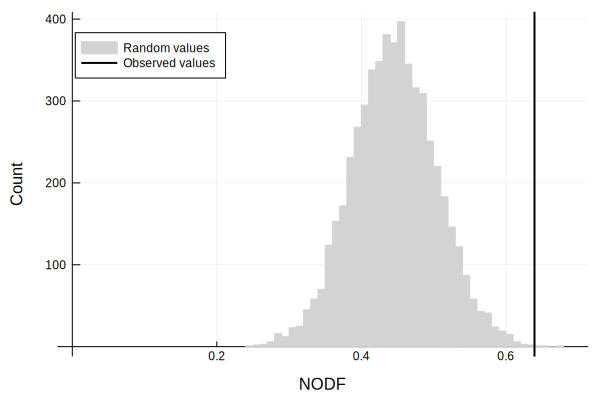

In [16]:
histogram(nodf_random, lab="Random values", c=:lightgrey, lc=:lightgrey, frame=:origin, legend=:topleft)
vline!([nodf(N)], lab="Observed values", c=:black, lw=2)
xaxis!("NODF")
yaxis!("Count")

It seems that the empirical network is more nested than a lot of the random networks! This would mean that the nestedness we observed in nature was *markedly higher* than what we expect if the mechanisms involved in the null model we used (the degree distribution) were acting alone.

At this point, we can ask whether this difference is significant. In a permutation test, we can approximate the *p*-value as the proportion of random networks that are *more* (or *less*) nested than the empirical one, which we can measure as follows:

In [28]:
1.0-sum(nodf_random .<= nodf(N))/length(nodf_random)

0.0010911074740862503

In this example, we can say that the network is *more* nested than expected by chance ($p \approx 10^{-3}$).